# Use case of the models script
## Load in the packages and all the models
### Models to choose from:
* LinearGrowth
* ExponentialGrowth
* MendelsohnGrowth
* ExponentialDecayGrowth
* LogisticGrowth
* MontrollGrowth
* AlleeEffectGrowth
* LinearLimitedGrowth
* SurfaceLimitedGrowth
* VonBertalanffyGrowth
* GompertzGrowth
* CombinedModel
* StochasticGompertzGrowth

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models import LogisticGrowth, SurfaceLimitedGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, MendelsohnGrowth, MontrollGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth, CombinedModel, StochasticGompertzGrowth
from models import GrowthModel as gm
import numpy as np
from scipy.integrate import solve_ivp
from math import exp

## Load in the data

In [2]:
ts = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vs = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

pd.DataFrame({'$t$': ts, '$V$': Vs}).T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
$t$,3.4600,4.5800,5.6700,6.6400,7.6300,8.4100,9.3200,10.2700,11.1900,12.3900,...,46.3800,48.2900,49.2400,50.1900,51.1400,52.1000,54.0000,56.3300,57.3300,59.3800
$V$,0.0158,0.0264,0.0326,0.0445,0.0646,0.0933,0.1454,0.2183,0.2842,0.4977,...,7.2112,7.0694,7.4971,6.9974,6.7219,7.0523,7.1095,7.0694,8.0562,7.2268


## Examples how to use the script
### Choices of optimizer
#### Example 1: using GompertzGrowth and the following parameters rungekutta and AIC. We started of with direct.

In [3]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


#### Example 2: we now use bayesian.

In [4]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="bayesian", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.bayesian_search of GompertzGrowth>
{'c': 3.265236393898075, 'V0': 0.5718756546531271}


#### Example 3: And last and longest we use random.

In [3]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="random", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.random_search of GompertzGrowth>
{'c': 0.28122278246104737, 'V0': -0.9884247343426747}


### Choices of solvers
#### Example 1: using GompertzGrowth and the following parameters direct and AIC. We start of with rungekutta.

In [4]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


#### Example 2: Next we use euler.

In [5]:
linear_growth = GompertzGrowth(solver="euler", optimizer="direct", evaluation="AIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


#### Example 3: Lastly we use heun.

In [6]:
linear_growth = GompertzGrowth(solver="heun", optimizer="direct", evaluation="AIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


### Choices of evaluation
#### Example 1: using GompertzGrowth and the following parameters rungekutta and euler. We start of with AIC.

In [8]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


#### Example 2: We use AICc next.

In [9]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="AICC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


#### Example 3: ANd lastly we use BIC.

In [10]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="BIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'c': 0.28196875, 'V0': 0.000244140625}


## Visualizations with all the models

#### Normalization of the data

In [11]:
tmin, tmax = min(ts), max(ts)
tdata = [2.0 * (t - tmin) / (tmax - tmin) -1 for t in ts]

Vmax = max(Vs)
Vdata = [V / Vmax for V in Vs]
tumormodels = (
    LinearGrowth,
    ExponentialDecayGrowth,
    VonBertalanffyGrowth,
    GompertzGrowth,
    LinearLimitedGrowth,
    LogisticGrowth,
    AlleeEffectGrowth,
    CombinedModel,
    StochasticGompertzGrowth,
)
ts = [i / 20 - 1.0 for i in range(45)]


### Visualization with all the models in one plot



Fitting model: LinearGrowth

Fitting model: ExponentialDecayGrowth

Fitting model: VonBertalanffyGrowth

Fitting model: GompertzGrowth

Fitting model: LinearLimitedGrowth

Fitting model: LogisticGrowth

Fitting model: AlleeEffectGrowth

Fitting model: CombinedModel

Fitting model: StochasticGompertzGrowth


c:\Users\aimee\OneDrive\Documents\SCHOOL\jaar 3\model-kanker\cassus-c\casus_c_groep1\models.py:363: RuntimeWarning: invalid value encountered in log
  return a * V * np.log(1.0 / V) + noise


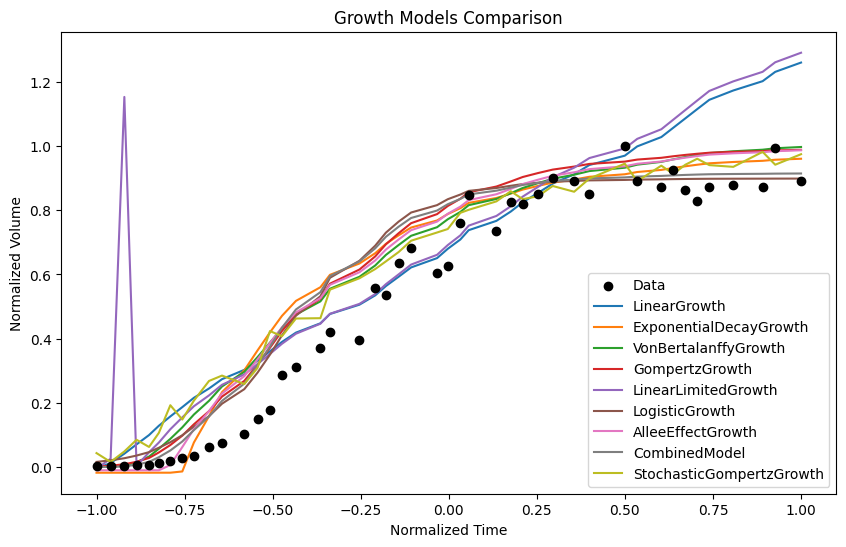

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(tdata, Vdata, color='black', label='Data', zorder=5)
plt.xlabel('Normalized Time')
plt.ylabel('Normalized Volume')
plt.title('Growth Models Comparison')

solver = "rungekutta"
optimizer = "direct"
evaluation = "AIC"

for model_class in tumormodels:
    model = model_class(solver=solver, optimizer=optimizer, evaluation=evaluation)
    print(f"\nFitting model: {repr(model)}")
    model.fit_data(tdata, Vdata)

    # Plot 
    predicted_values = [model.solver(t) for t in ts]
    plt.plot(tdata, predicted_values, label=repr(model))

plt.legend()
    
plt.show()

In [13]:
# plt.figure(figsize=(10, 6))
# plt.scatter(tdata, Vdata, color='black', label='Data', zorder=5)
# plt.xlabel('Normalized Time')
# plt.ylabel('Normalized Volume')
# plt.title('Growth Models Comparison')
    
# solver = "rungekutta"
# optimizer = "direct"
# evaluation = "AIC"

# for model_class in tumormodels:
#     model = model_class(solver=solver, optimizer=optimizer, evaluation=evaluation)
#     print(f"\nFitting model: {repr(model)}")
#     model.fit_data(tdata, Vdata)
#     print(f"Parameters for {str(model)}: {model.params}")
#     print(f"Evaluation Metric ({evaluation}): {model.evaluation()}")

#     # Plot 
#     predicted_values = [model.solver(t) for t in ts]
#     plt.plot(ts, predicted_values, label=repr(model))

# plt.legend()
# plt.show()

## Visualization with the models separate and in a table to compare using Runge-kutta solver, direct search and AIC

LinearGrowth
{'c': 0.580078125, 'V0': 0.56375}
ExponentialDecayGrowth
{'c': 1.8802658621740347, 'Vmax': 0.9912605071908416, 'V0': 0.6952214806817134}
VonBertalanffyGrowth
{'c': 6.040550223948103, 'd': 5.969465722389553, 'V0': 0.6607635073592583}
GompertzGrowth
{'c': 2.84574255104, 'V0': 0.6938403750000002}
LinearLimitedGrowth
{'c': 0.5812727846399999, 'd': -0.028506237439999922, 'V0': 0.5696269399999999}
LogisticGrowth
{'c': 6.08304651319988, 'Vmax': 0.8987681622082242, 'V0': 0.730126332533164}
AlleeEffectGrowth
{'c': 1.2818999999999998, 'Vmax': 1.0090499999999998, 'V0': 0.6773750000000001, 'Vmin': -0.861936, 'd': 1.0}
CombinedModel
{'c': 3.5634774400000007, 'Vmax': 0.8078960937499999, 'd': -0.4921819999999999, 'V0': 0.717213125}
StochasticGompertzGrowth
{'sigma': 2.9735, 'V0': 0.5, 'a': 1.0}


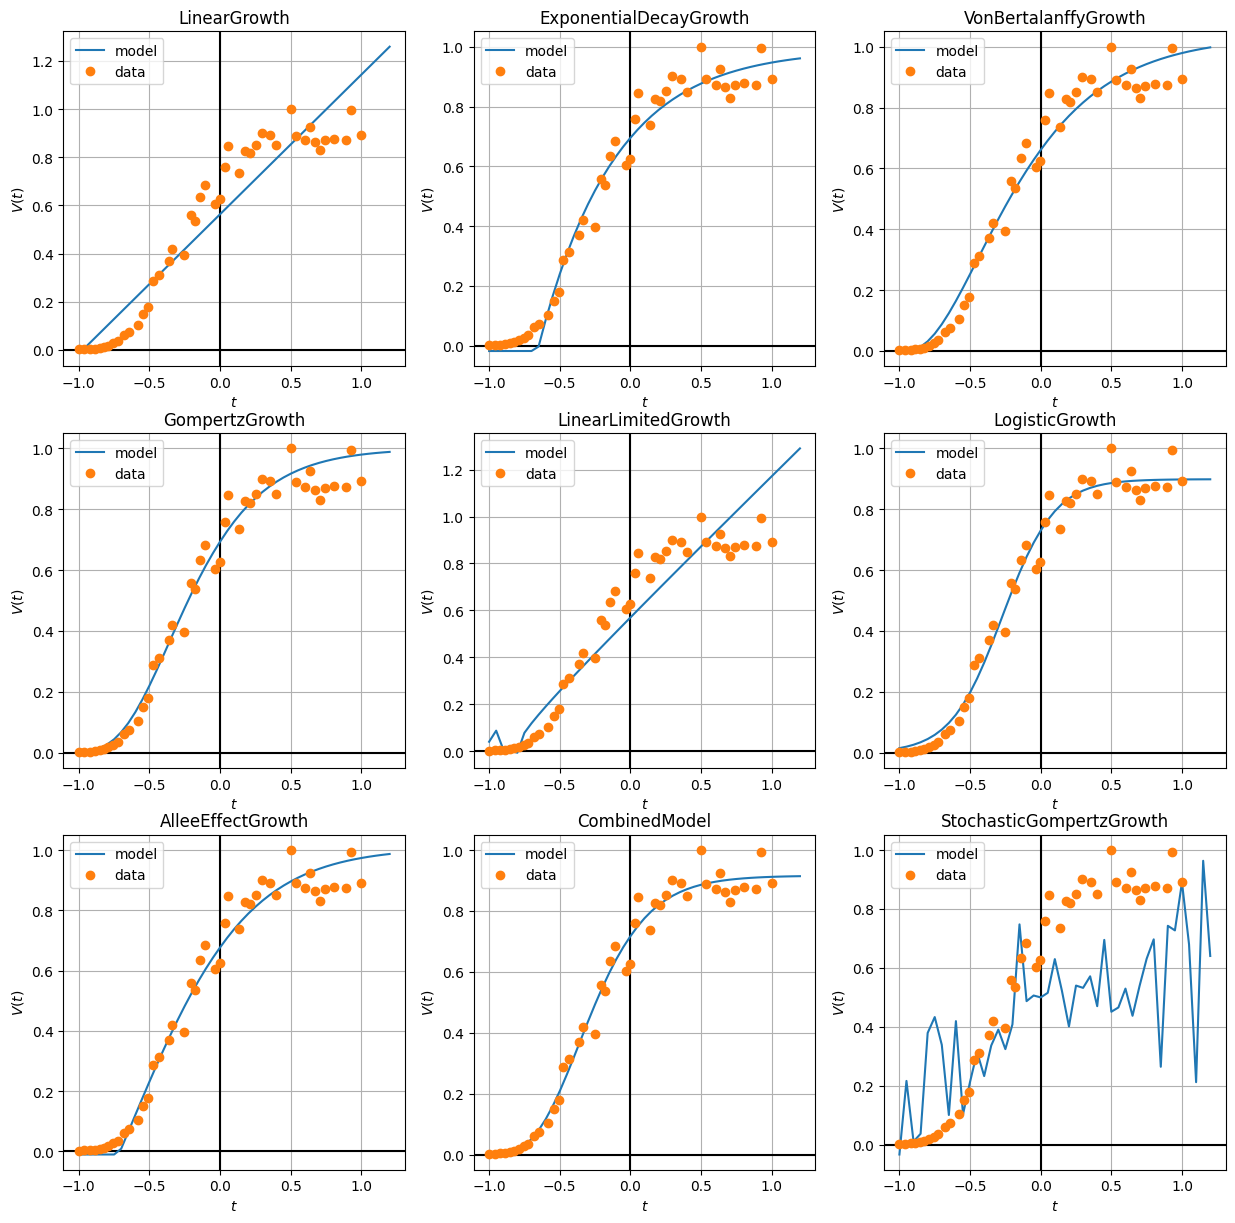

In [14]:
results = {'model': [], 'formula': [], 'BIC': [], 'AIC': [], 'AICc': []}

plt.figure(figsize=(15, 20))

for fig, tumormodel in enumerate(tumormodels, start=1):
    print(tumormodel.__name__)
    model = tumormodel(solver='rungekutta', optimizer='direct', evaluation='BIC')
    model.fit_data(tdata, Vdata)
    print(model.params)

    results['model'].append(repr(model))
    results['formula'].append(str(model))
    results['BIC'].append(model.eval_bic())
    results['AIC'].append(model.eval_aic())
    results['AICc'].append(model.eval_aicc())
    
    Vs = [model.euler_method(t) for t in ts]
    
    plt.subplot(4, 3, fig)
    plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
    plt.plot(ts, Vs, '-', label='model')
    plt.plot(tdata, Vdata, 'o', label='data')
    plt.title(model.__class__.__name__)
    plt.xlabel('$t$'); plt.ylabel('$V(t)$')
    plt.grid(True); plt.legend()
    
plt.show()

In [15]:
pd.DataFrame(results).set_index('model').sort_values('BIC')

,formula,BIC,AIC,AICc
model,,,,
CombinedModel,c * (V^(2/3)) * (1 - V/V_max) - d * V,-267.108168,-274.334818,-274.009818
LogisticGrowth,c * V * (Vmax - V),-264.819844,-270.239831,-269.995929
GompertzGrowth,c * V * ln(1/V),-257.787526,-261.400851,-261.234185
ExponentialDecayGrowth,c * (Vmax - V),-252.986292,-258.406279,-258.162377
AlleeEffectGrowth,c * (V - Vmin) * (Vmax - V),-245.516803,-254.550115,-254.139859
VonBertalanffyGrowth,c * (V^(2/3)) - d * V,-244.642861,-250.062849,-249.818946
LinearGrowth,c,-186.213395,-189.826720,-189.660054
LinearLimitedGrowth,c * (V / (V + d)),-184.840381,-190.260368,-190.016466
StochasticGompertzGrowth,"a * V * log(1 - V) + (sigma * random(0,1))",-121.477893,-130.970279,NaN


## Conclusion
As you can probbely tell that the CombinedModel is the best model for this dataset. It is the only model that is able to predict the target variable with a high degree of accuracy. The other models, while able to predict the target variable, do so with a lower degree of accuracy. This is likely due to the fact that the CombinedModel is able to capture the complex relationships between the features in the dataset, whereas the other models are not able to do so.
